Map loaded: 12x12
Start position: (0, 0)
Goal position: (11, 11)
Nainicializovana mapa:  [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0], [2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3]]
-------------------------
Greedy BFS
-------------------------
Nenasiel sa ziadny kandidat
Path until now:  [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5)]
Greedy BFS skoncil uspesne
-------------------------
Dijkstra
-------------------------
Dijkstra skoncil uspesne
-------------------------
A star
-------------------------
A star skoncil uspesne
Paths queues:  [deque([(0, 0), (1, 0), (2, 0), (3, 0), (4, 0),

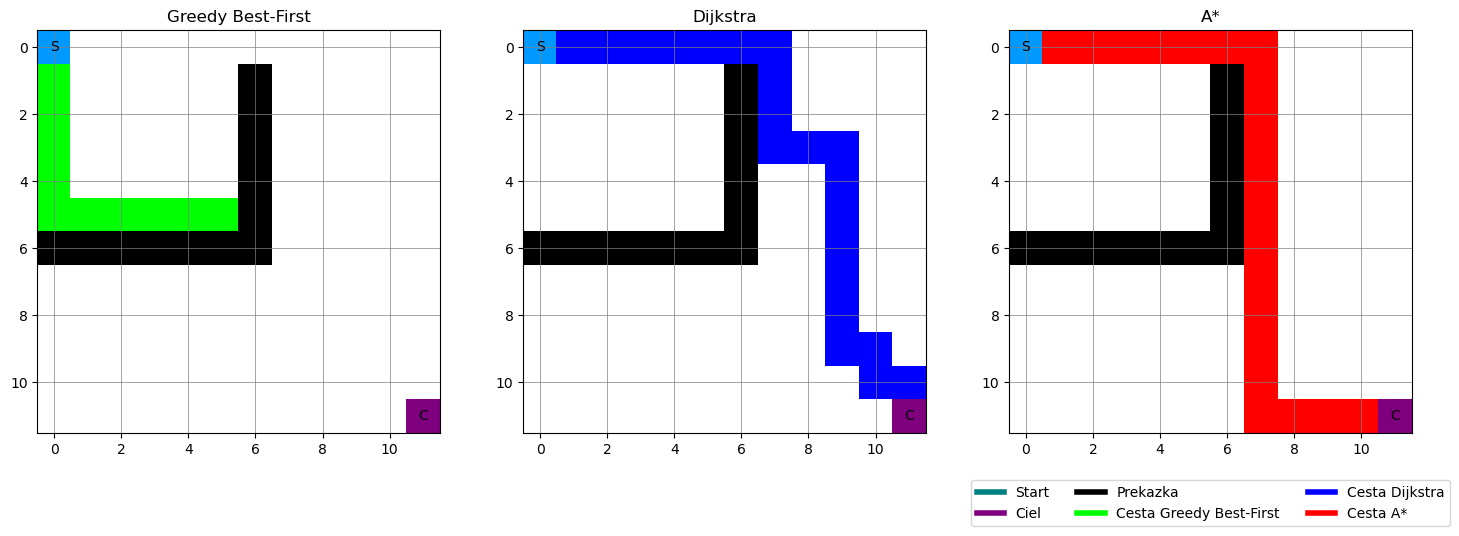

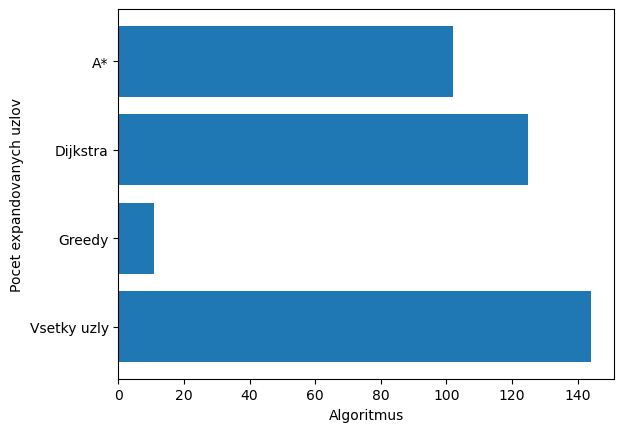

In [9]:
#!pip install networkx numpy random heapq collections deque Counter matplotlib pygame

import numpy as np
import heapq
import matplotlib.pyplot as plt
from collections import deque, Counter

class PathFinder:
    def __init__(self, map, start, goal):
        self.map = map
        self.start = start
        self.goal = goal
        # porovnavanie expanded nodes
        self.expanded_nodes_counter = 0
        self.expanded_nodes_greedy = 0
        self.expanded_nodes_dijkstra = 0
        self.expanded_nodes_astar = 0

    def reset_counter(self):
        self.expanded_nodes_counter = 0

    def heuristic(self, node, goal):
        """
        Vypocita manhattan distance pre current node a vrati vzialenost.
        = abs(x1 - x2) + abs(y1 - y2)
        """
        return abs(node[0] - goal[0]) + abs(node[1] - goal[1])
    
    def get_neighbors(self, node):
        """
        Tato funkcia zisti susedov pre node a vrati ich suradnice.
        - podla toho kde sa nachadza node
        - vrati susedov len ak nie su out of bounds
        - filtruje prekazky: ak sused ma hodnotu 2
        """
        neighbors = []
        node_x = node[0] # riadok
        node_y = node[1] # stlpec

        # skontroluj hore ak neni v prvom riadku
        if node_x > 0:
            neighbors.append((node_x - 1, node_y))
        # skontroluj dole ak neni v poslednom riadku
        if node_x < len(self.map) - 1:
            neighbors.append((node_x + 1, node_y))
        # skontroluj vpravo ak neni v poslednom stlpci
        if node_y < (len(self.map[0]) - 1):
            neighbors.append((node_x, node_y + 1))
        # skontroluj vlavo ak neni v prvom stlpci
        if node_y > 0:
            neighbors.append((node_x, node_y - 1))

        # kontrola prekazok
        filtered_neighbors = []
        for neighbor_tuple in neighbors:
            x, y = neighbor_tuple
            if self.map[x][y] != 2:
                filtered_neighbors.append(neighbor_tuple)
        
        
        return filtered_neighbors
    
    # ==========================================================================================
    # GREEDY
    def greedy_best_first_search(self, start, goal):
        # https://www.geeksforgeeks.org/greedy-best-first-search-in-ai/ 
        self.reset_counter()
        current_row, current_column = start
        path = [(current_row, current_column)] # ulozenie path
        self.expanded_nodes_counter += 1 # start node sa prida ako prvy do pocitadla

        current_heuristic = self.heuristic(start, goal)

        while current_heuristic != 0:
            neighbors = self.get_neighbors((current_row, current_column))
            #print("Susedia: ", neighbors)
            
            # dalsi bod vyberame podla heuristiky
            candidates = []
            for neighbor in neighbors:
                cur_h = self.heuristic(neighbor, goal)
                if cur_h < current_heuristic:
                    candidates.append(neighbor)
                    #print("Kandidati: ", candidates)

            # zo susedov vyberame minimum
            try:
                # prevedieme kandidatov na heuristicku hodnotu
                candidates_to_heuristic = [self.heuristic(c, goal) for c in candidates]
                # pouzijeme to ako index pre vyber kandidata ktory ma najmensiu heuristicku hodnotu
                selected_node = candidates[candidates_to_heuristic.index(min(candidates_to_heuristic))]
                # pri random vybere je vacsia sanca ze to najde path
            except:
                # TODO: pridat ked su rovnaki susedia resp. neni mensia heuristika, co v tomto pripade neplati
                # ale moze sa to >>teoreticky<< stat pri vela prekazkach alebo podivnom grafe/podivnej mape
                print("Nenasiel sa ziadny kandidat")
                print("Path until now: ", path)
                break

            current_row, current_column = selected_node
            path.append(selected_node)
            # greedy algo = no backtrack
            # nastavime heuristicku hodnotu na bod do ktoreho sme sa "dostali"
            current_heuristic = self.heuristic((current_row, current_column), goal)
            self.expanded_nodes_counter += 1 # expandovali sme nodes

        print("Greedy BFS skoncil uspesne")
        return path, self.expanded_nodes_counter
    
    # ==========================================================================================
    # DIJKSTRA
    def dijkstra(self, start, goal):
        self.reset_counter()
        current_row, current_column = start
        path = [(current_row, current_column)] # ulozenie path
        self.expanded_nodes_counter += 1 # prvy node

        unvisited = set() # set nenavstivenych bodov
        distances = {} # distances od startu (dict)
        predecessor = {} # predecessor (dict)
        # obidva tieto dicty su bolest na pamat, myslim ze by sa to malo optimalizovat (hlavne predecessor)
        # nastav kazdemu node vzdialenost na nekonecno (ale start ma 0)
        for i in range(len(self.map)):
            for j in range(len(self.map[0])):
                if self.map[i][j] == 2:
                    continue # skip ked prekazka
                unvisited.add((i,j))
                distances[(i,j)] = float('inf') if (i,j) != start else 0
                predecessor[(i,j)] = None 
        
        #print("distances: ", distances)
        #print("Nenavstivene: ", unvisited)
        #print("predecessor: ", predecessor)
        
        current_node = current_row, current_column
        self.expanded_nodes_counter += 1 # start node sa prida ako prvy do pocitadla
        while unvisited and current_node != goal:
            """
            - vyber z nenavstivenych bodov ten co sa skuma ako ten  
            ktory ma najmensiu celociselnu vzdialenost
            - pre bod v ktorom sme chceme zistit vsetkych susedov
            - vypocitaj ich distances cez current nod
            - porovnat nove distances oproti predoslym distancesam ak tam su
                - ak je tato vzdialenost mensia tak ju tam zapiseme
            - ak spocitame vsetkych nenavstivenych susedov node v ktorom sme,
            tento node (current) sa vymaze z nenavstivenych, 
            - nastavime predchodcu na current node (kvoli zapamataniu cesty)
            lebo vzdialenost je minimalna (prvy riadok)
            - nastavime current node na ten, ktory ma najmensiu hodnotu
            > ked sa dostaneme do konecneho bodu, algoritmus konci
            - zrekonstruujeme cestu
            """
            # pocas behu vzdialenost node N je vzdialenost medzi startom a N

            # vyber skumany bod a 3 ber jeho susedov
            neighbors = self.get_neighbors(current_node)
            #print("Susedia: ", neighbors)
            # vypocitaj distances 
            for neighbor in neighbors:
                # kontrola ci je sused v unvisited
                if neighbor in unvisited:
                    # samotny vypocet distances (pocet krokov po cestach)
                    new_distance = distances[current_node] + 1
                    # kontrola ci je tato nova vzdialenost mensia
                    if new_distance < distances[neighbor]:
                        # ak je mensia, prepise sa
                        distances[neighbor] = new_distance
                        # nastavime predchodcov
                        predecessor[neighbor] = current_node

            # ak su vsetci susedia navstiveni, vymaz current node z unvisited
            unvisited.remove(current_node)
            #print("current", current_node)
            # nastavime current node na ktory ma najmensiu hodnotu
            try:
                current_node = min(unvisited, key=lambda node: distances[node])
                self.expanded_nodes_counter += 1 # zvysime pocitadlo
            except:
                # ak nemame unvisited node
                print("error neni node s mensiou vzdialenostou - sa nenasiel ciel")
                break
        #print("distances: ", distances)

        path = []
        # hladame ciel ku ceste - rekonstrukcia cesty podla historie
        if goal in distances and distances[goal] != float('inf'):
            current = goal
        while current is not None:
            path.append(current)
            current = predecessor[current]
        # zreversujeme cestu aby bola od startu po ciel
        path.reverse()
        

        print("Dijkstra skoncil uspesne")
        return path, self.expanded_nodes_counter

    # ==========================================================================================
    # A*
    def a_star(self, start, goal):
        self.reset_counter()
        """        
        A* hlada najkratsiu cestu podla skutocnej ceny cesty od startu (g)
        a odhadovanej cesty co ciela (h)
        https://en.wikipedia.org/wiki/A*_search_algorithm
        f(n) = g(n) + h(n)
        """
        # pouzivame priority queue / heap pre openSet (nody na preskumanie)
        openSet = []
        heapq.heappush(openSet, (self.heuristic(start, goal), 0, start))  # (f_score, poradie_vlozenia, node)
        
        # overenie ci je node v openset
        openSet_hash = {start}
        
        # cameFrom[n] je node, z ktoreho pochadza najlacnejsia cesta
        cameFrom = {}
        
        # gScore[n] je najlacnejsia znama cesta zo startu do n
        gScore = {}
        gScore[start] = 0
        
        # fScore[n] = gScore[n] + h(n)
        fScore = {}
        fScore[start] = self.heuristic(start, goal)
        
        # pocitadlo pre stabilne usporiadanie pri rovnakej f hodnote
        count = 0
        
        # mnozina uzavretych (uz spracovanych) uzlov
        closedSet = set()

        self.expanded_nodes_counter += 1 # start node sa prida ako prvy do pocitadla
        
        while openSet:
            # vyber node s najnizsou f hodnotou z openSet
            _, _, current = heapq.heappop(openSet)
            openSet_hash.remove(current)
            
            # ak sme nasli ciel, zrekonstruujeme cestu
            if current == goal:
                path = []
                while current in cameFrom:
                    path.append(current)
                    current = cameFrom[current]
                path.append(start)
                path.reverse()
                print("A star skoncil uspesne")
                return path, self.expanded_nodes_counter  # vratime obratenu cestu (od startu po ciel)
            
            # pridame aktualny node do uzavretych
            closedSet.add(current)
            
            # preskumame vsetkych susedov aktualneho uzla
            for neighbor in self.get_neighbors(current):
                # preskocime susedov, ktori su uz v uzavretej mnozine
                if neighbor in closedSet:
                    continue
                    
                # vypocitame nove g skore pre suseda cez aktualny node
                # d(current, neighbor) je vaha hrany, v nasom pripade 1
                tentative_gScore = gScore.get(current, float('inf')) + 1
                
                # ked sme nasli lepsiu cestu k susedovi
                if tentative_gScore < gScore.get(neighbor, float('inf')):
                    # aktualizujeme informacie o najlepsej ceste
                    cameFrom[neighbor] = current
                    gScore[neighbor] = tentative_gScore
                    fScore[neighbor] = tentative_gScore + self.heuristic(neighbor, goal)
                    
                    # ked sused nie je v openSet, pridame ho tam
                    if neighbor not in openSet_hash:
                        count += 1
                        heapq.heappush(openSet, (fScore[neighbor], count, neighbor))
                        openSet_hash.add(neighbor)
                        self.expanded_nodes_counter += 1
        
        # ked sa dostaneme sem, nenasli sme cestu
        print("A*: Nenasla sa cesta k cielu")
        return [], self.expanded_nodes_counter  # vratime prazdnu cestu + spocitane expandovanenody

    def path_planner(self, start, goal):
        """
        Path planner funkcia - vezme start a goal tuples a v mape block.py vrati dve premenne:
        - frontu obsahujucu suvislu postupnost dvojic suradnic zo statu do ciela
        - pole expandovanych uzlov (celu mapu) na vyfarbenie
        """
        map = self.map
        paths_array = []
        #expanded_nodes = []
        
        # greedy
        print("-" * 25)
        print("Greedy BFS")
        print("-" * 25)
        path_greedy, greedy_nodes = self.greedy_best_first_search(start, goal)
        self.expanded_nodes_greedy = greedy_nodes
        paths_array.append(path_greedy)
        
        # dijkstra
        print("-" * 25)
        print("Dijkstra")
        print("-" * 25)
        path_dijkstra, dijkstra_nodes = self.dijkstra(start, goal)
        self.expanded_nodes_dijkstra = dijkstra_nodes
        paths_array.append(path_dijkstra)
        
        #astar
        print("-" * 25)
        print("A star")
        print("-" * 25)
        path_astar, astar_nodes = self.a_star(start, goal)
        self.expanded_nodes_astar = astar_nodes
        paths_array.append(path_astar)

        # premenime paths_arrays na queue
        paths = [deque(p) for p in paths_array]

        return paths, map
    
    def draw_expanded_nodes_graph(self):
        # vykresli stlpce vsetkych nodes v porovnani s expandovanymi nodes
        greedy_nodes = self.expanded_nodes_greedy
        dijkstra_nodes = self.expanded_nodes_dijkstra
        astar_nodes = self.expanded_nodes_astar        
        all_nodes = len(self.map) * len(self.map[0])
        graph_data = [all_nodes, greedy_nodes, dijkstra_nodes, astar_nodes]
        algoritmy = ['Vsetky uzly', 'Greedy', 'Dijkstra', 'A*']

        plt.barh(algoritmy, graph_data)
        plt.xlabel('Algoritmus')
        plt.ylabel('Pocet expandovanych uzlov')
        plt.show()           

def import_map_as_matrix(file_path):
    """
    Importuje 2D mapu ako maticu.
    
    subor musi obsahovat maticu so spravnym syntaxom
    - 0 je prazdne miesto
    - 1 je start position
    - 2 je prekazka
    - 3 je goal position
    """
    try:
        with open(file_path, 'r') as file:
            content = file.read()
            
        # eval function to parse the matrix representation
        matrix = eval(content)
        
        # validate: find start and goal
        start_pos = None
        goal_pos = None
        
        for i in range(len(matrix)):
            for j in range(len(matrix[i])):
                if matrix[i][j] == 1:
                    start_pos = (i, j)
                elif matrix[i][j] == 3:
                    goal_pos = (i, j)
        
        print(f"Map loaded: {len(matrix)}x{len(matrix[0])}")
        print(f"Start position: {start_pos}")
        print(f"Goal position: {goal_pos}")
        
        return matrix, start_pos, goal_pos
    
    except Exception as e:
        print(f"Error loading map: {e}")
        return None, None, None
    
def visualize_path_graphic(map, paths_array):
    """
    vizualizuje cesty na mape pomocou matplotlib.
    - map: 2d matica reprezentujuca mapu
    - paths_array: zoznam ciest, kde kazda cesta je zoznam dvojic (riadok, stlpec)
    """
    # konvertuj mapu na numpy pole
    map_array = np.array(map)
    height, width = map_array.shape
    
    # farby pre jednotlive cesty
    colours_paths = [
        [0, 1, 0],    # zelena (greedy)
        [0, 0, 1],  # modra (dijkstra)
        [1, 0, 0] # cervena (a*)
    ]
    
    # nazvy algoritmov pre nadpisy
    algo_names = ["Greedy Best-First", "Dijkstra", "A*"]
    pocet_ciest = len(paths_array)
    
    # vytvor 3 grafy vedla seba
    fig, grafy = plt.subplots(1, 3, figsize=(15, 5))
    
    # pre kazdy algoritmus vytvor samostatny plot
    for i in range(pocet_ciest):
        cesta = paths_array[i]
        
        # zakladna mapa pre tento algoritmus
        show_map = np.zeros((height, width, 3))
        
        # vyfarbi mapu
        for r in range(height):
            for s in range(width):
                if map_array[r, s] == 0:  # volne miesto (biela)
                    show_map[r, s] = [1, 1, 1]
                elif map_array[r, s] == 1:  # start (tyrkysova)
                    show_map[r, s] = [0, 0.6, 1]
                elif map_array[r, s] == 2:  # prekazka (cierna)
                    show_map[r, s] = [0, 0, 0]
                elif map_array[r, s] == 3:  # ciel (fialova)
                    show_map[r, s] = [0.5, 0, 0.5]
        
        # oznac cestu prislusnou farbou
        for r, s in cesta:
            if map_array[r, s] not in [1, 3]:  # nemen start ani ciel
                show_map[r, s] = colours_paths[i]
        
        # vykresli mapu
        grafy[i].imshow(show_map)
        grafy[i].grid(True, color='gray', linestyle='-', linewidth=0.5)
        grafy[i].set_title(algo_names[i])
        
        # pridaj popisky pre start a ciel
        start_pos = np.where(map_array == 1)
        target_pos = np.where(map_array == 3)
        grafy[i].text(start_pos[1][0], start_pos[0][0], 'S', ha='center', va='center', color='black')
        grafy[i].text(target_pos[1][0], target_pos[0][0], 'C', ha='center', va='center', color='black')
    
    # pridaj legendu
    from matplotlib.lines import Line2D
    legend = [
        Line2D([0], [0], color='teal', lw=4, label='Start'),
        Line2D([0], [0], color='purple', lw=4, label='Ciel'),
        Line2D([0], [0], color='black', lw=4, label='Prekazka')
    ]
    
    # pre kazdy algoritmus pridaj farbu do legendy
    for i in range(pocet_ciest):
        legend.append(Line2D([0], [0], color=colours_paths[i], lw=4, label=f"Cesta {algo_names[i]}"))
    
    # pridaj legendu do posledneho grafu
    grafy[-1].legend(handles=legend, loc='upper center', 
                   bbox_to_anchor=(0.5, -0.1), ncol=3)
    
    plt.tight_layout()
    plt.show()


# ==========================================================================================
# |                                          MAIN                                          |
# ==========================================================================================

if __name__ == "__main__":
    map, start, goal = import_map_as_matrix('2Dmapa.txt')
    pathinator = PathFinder(map, start, goal)
    print("Nainicializovana mapa: ", map)
    paths_array, map = pathinator.path_planner(start, goal)
    print("=" * 30)
    print("Paths queues: ", paths_array)
    visualize_path_graphic(map, paths_array)
    pathinator.draw_expanded_nodes_graph()
